In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotbin.plot_velfield import plot_velfield
from My_Jampy import JAM               #My class
import jam_axi_rms_example             #Cappellari's example

jam_axi_rms elapsed time sec: 0.82
inc=60.0 beta_z=0.30 M/L=1.2 BH=1.20e+08 chi2/DOF=0.687
Total mass MGE: 6.753e+10
Best ML fitted: 1.204090391528112


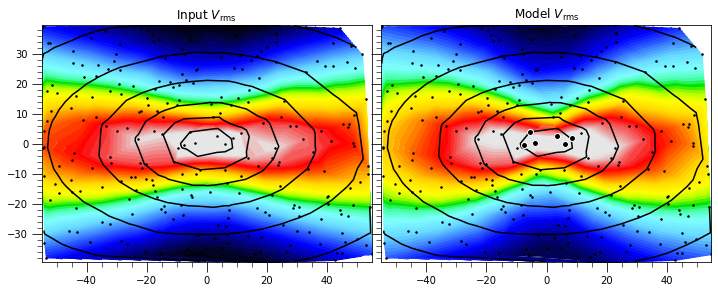

In [2]:
#Frist plot the Cappellaris example and take the inputs

plt.figure(figsize=(12,12))
xbin, ybin, rms, surf_lum, sigma_lum, qobs_lum, sigmapsf, normpsf, pixsize, goodbins, beta, original_model = jam_axi_rms_example.jam_axi_rms_example()

In [3]:
#Now we star our Jampy class
#Frist we set the same parameters, and let jampy find the best ML, as the original.
Jam_model = JAM(ybin=ybin, xbin=xbin, inc=60, distance=16.5, mbh=1e8, rms=rms, beta=beta,
                   normpsf=normpsf, sigmapsf=sigmapsf, pixsize=pixsize, goodbins=goodbins)

#Add Luminosity component
Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum)

jam_axi_rms elapsed time sec: 0.77
inc=60.0 beta_z=0.30 M/L=1.2 BH=1.20e+08 chi2/DOF=0.687
Total mass MGE: 6.753e+10


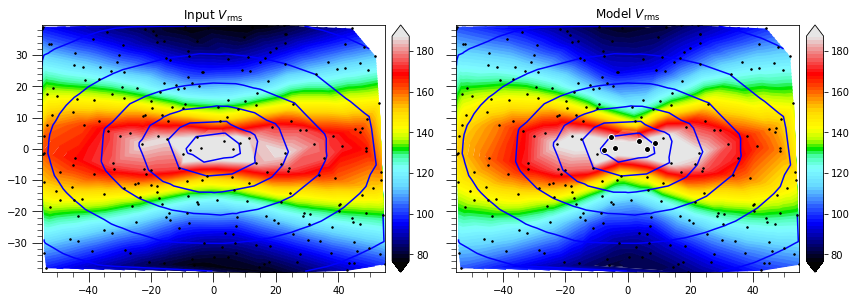

In [4]:
#Run my Jam class
plt.figure(figsize=(12,12))
My_model, ml, chi2, chi2T = Jam_model.run(plot=True, quiet=False, cmap="sauron",nodots=False)
plt.tight_layout()

ValueError: Contour levels must be increasing

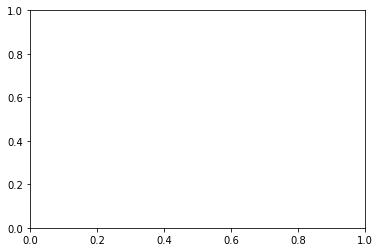

In [5]:
#Plot difference from original model and my model
diff = original_model - My_model
plot_velfield(xbin, ybin, diff) #Dont show the plot because the diff is zero

In [6]:
#Now, assuming that we now how the best ML, we set it. 
#This is done because we want to test the ML convertion of My_Jampy class

best_ml = 1.2017790261489831      #Printed with the original model
Jam_model = JAM(ybin=ybin, xbin=xbin, inc=60, distance=16.5, mbh=1e8*best_ml, rms=rms, beta=beta,
                   normpsf=normpsf, sigmapsf=sigmapsf, pixsize=pixsize, goodbins=goodbins)

#Add Luminosity component
Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=best_ml)

jam_axi_rms elapsed time sec: 0.78
inc=60.0 beta_z=0.30 M/L=1 BH=1.20e+08 chi2/DOF=0.687
Total mass MGE: 6.74e+10


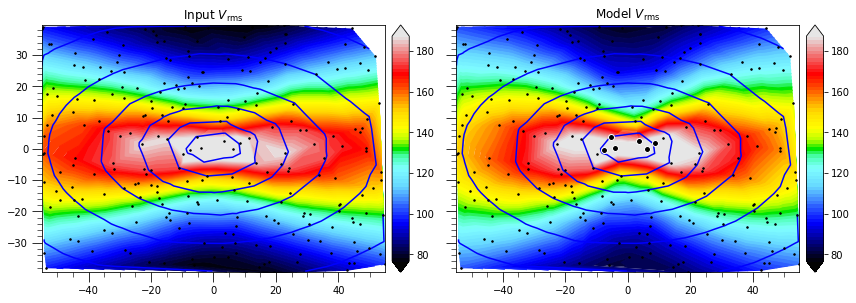

In [7]:
#Run my Jam class
plt.figure(figsize=(12,12))
My_model, ml, chi2, chi2T = Jam_model.run(plot=True, quiet=False, cmap="sauron",nodots=False)
plt.tight_layout()

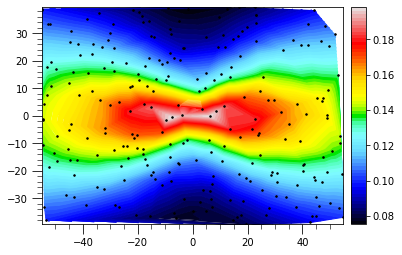

In [8]:
#Plot difference from original model and my model
diff = original_model - My_model
plot_velfield(xbin, ybin, diff, colorbar=True)

## For testing best fit of emcee

ML  1.32

Beta  0.80

Inclination  55.88

Log_MBH  7.00


In [60]:
#Now, assuming that we now how the best ML, we set it. 
#This is done because we want to test the ML convertion of My_Jampy class
best_beta = np.full_like(surf_lum,  0.80)
best_ml = 1.32      #Printed with the original model
Jam_model = JAM(ybin=ybin, xbin=xbin, inc= 55.88, distance=16.5, mbh=10**(7.00), rms=rms, beta=best_beta,
                   normpsf=normpsf, sigmapsf=sigmapsf, pixsize=pixsize, goodbins=goodbins)

#Add Luminosity component
Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=best_ml)

jam_axi_rms elapsed time sec: 0.76
inc=55.9 beta_z=0.80 M/L=1 BH=1.00e+07 chi2/DOF=0.0953
Total mass MGE: 7.391e+10


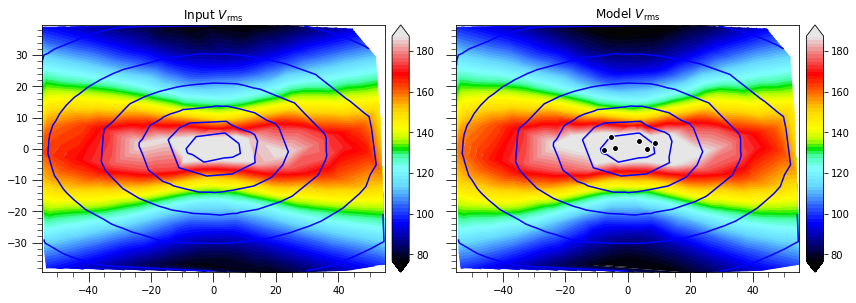

In [61]:
plt.figure(figsize=(12,12))
My_model, ml, chi2, chi2T = Jam_model.run(plot=True, quiet=False, cmap="sauron")
plt.tight_layout()

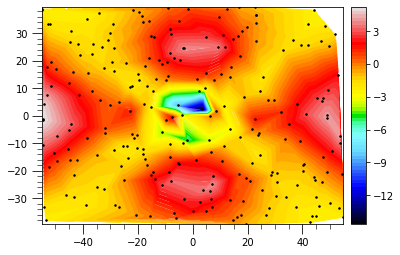

In [62]:
#Plot difference between data and my model
diff = rms - My_model
plot_velfield(xbin, ybin, diff, colorbar=True)